In [1]:
library(ggplot2)
library(cowplot)
library(ggthemes)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘ggthemes’

The following object is masked from ‘package:cowplot’:

    theme_map



In [2]:
dir = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/"

In [3]:
list.files(dir)

[1] "?"                "mean"             "median"           "pca.e"           
 [5] "pca.o"            "sum"              "totmean"          "totmedian"       
 [9] "totsum"           "weightedMean.tgz" "weightstd.tgz"

In [4]:
######## 'dr' methods

In [5]:
#### dr-mean

In [6]:
filename = paste0(dir,"mean/day0_healthy_doubleQC/pseudobulk_platebasedmean_scater.tsv")
drmean = read.csv(filename, sep = "\t")
# head(drmean)

In [7]:
#### dr-sum

In [8]:
filename = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/day0_healthy_doubleQC/pseudobulk_platebasedsum_edgeR_norm_log.tsv"
drsum = read.csv(filename, sep = "\t")
# head(drsum)

In [9]:
#### dr-median

In [10]:
filename = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/day0_healthy_doubleQC/pseudobulk_platebasedmedian_scater.tsv"
drmedian = read.csv(filename, sep = "\t")
# head(drmedian)

In [11]:
################################
######## 'd' methods

In [12]:
#### d-mean

In [13]:
filename = paste0(dir,"totmean/day0_healthy_doubleQC/pseudobulk_platebasedtotmean_scater.tsv")
dmean = read.csv(filename, sep = "\t")
# head(dmean)

In [14]:
#### d-sum

In [15]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/thesis/totsum_day0.tsv"
dsum = read.csv(filename, sep = "\t")
# head(dsum)

In [16]:
#### d-median

In [17]:
# filename = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/day0_healthy_doubleQC/pseudobulk_totmedian_scater.tsv"
filename = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/day0_healthy_doubleQC/pseudobulk_platebasedtotmedian_scater_duplicate.tsv"
dmedian = read.csv(filename, sep = "\t")
head(dmedian)

,aowh_2,aoxv_3,bezi_1,bokz_5,cicb_2,ciwj_2,cuhk_2,datg_2,eesb_1,eipl_1,...,wibj_2,wigw_2,wuye_2,xojn_3,yelp_3,yemz_1,yoch_6,zagm_1,zapk_3,zerv_8
ENSG00000223972,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000227232,1.906685,2.233657,2.827841,1.998796,2.42212,1.911812,2.606245,1.751852,2.254585,2.425148,...,2.33566,1.785264,2.47336,2.240983,1.770093,2.501661,2.819042,1.722832,1.925561,1.577895
ENSG00000243485,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237613,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000268020,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000240361,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
## make these comparisons on the set of common genes

In [19]:
df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods_and_bulk.csv", row.names=1)
common_genes = as.character(df_common_genes$genes)
length(common_genes)
head(common_genes)
# head(df_common_genes,2)

[1] 12720

[1] "ENSG00000007047" "ENSG00000007255" "ENSG00000012061" "ENSG00000073008"
[5] "ENSG00000104853" "ENSG00000104856"

In [20]:
# Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
# G_file = read.csv(Giordanos_selection, sep = "\t")
# G_file = G_file[G_file$gene %in% common_genes,]
# nrow(G_file)
# head(G_file,2)

In [21]:
drmean = drmean[rownames(drmean) %in% common_genes,]
drsum = drsum[rownames(drsum) %in% common_genes,]
drmedian = drmedian[rownames(drmedian) %in% common_genes,]
###
dmean = dmean[rownames(dmean) %in% common_genes,]
dsum = dsum[rownames(dsum) %in% common_genes,]
dmedian = dmedian[rownames(dmedian) %in% common_genes,colnames(dmedian) %in% colnames(dmean)]

In [22]:
# select 4 donors at random
donors = colnames(dmean)
selected_donors = sample(1:length(donors), 4)

In [23]:
### d-mean vs d-sum

In [24]:
pl = list()
j = 1
for (i in selected_donors){
    df = data.frame(x = dmean[,i], y = dsum[,i])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[j])  
    p = p + xlab("d-mean") + ylab("d-sum")
    p = p + ggtitle(donors[i]) + theme_classic()
    p = p + annotate("text", x = 7.5, y = 2.5, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

In [25]:
df1 = data.frame()
for (i in 1:length(donors)){
    donor = donors[i]
    d_mean = as.numeric(dmean[,colnames(dmean) == donor])
    d_sum = as.numeric(dsum[,colnames(dsum) == donor])
    df1 = rbind(df1, data.frame(donor = donor, corr = cor(d_mean,d_sum)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


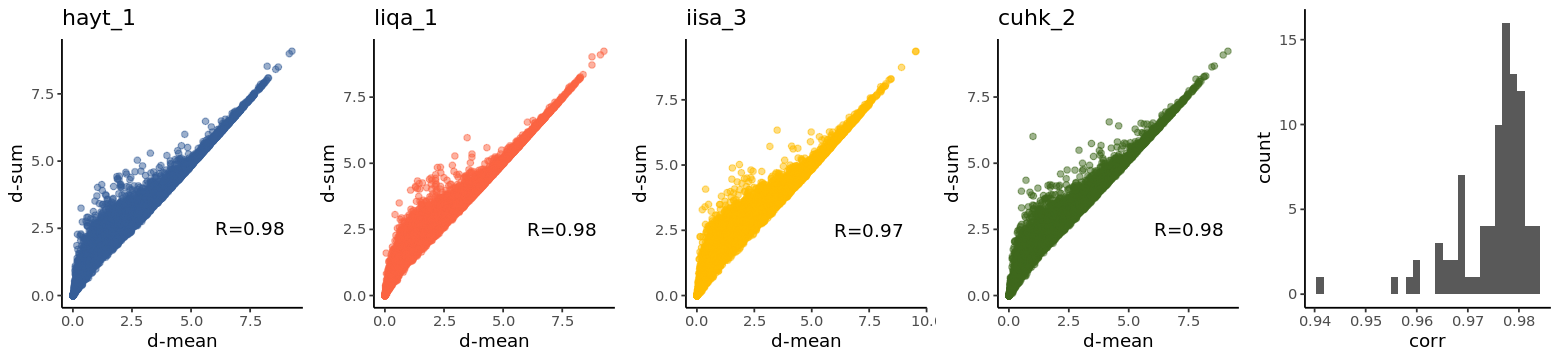

In [26]:
options(repr.plot.width = 13, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], ncol=5)

In [27]:
### d-mean vs d-median

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


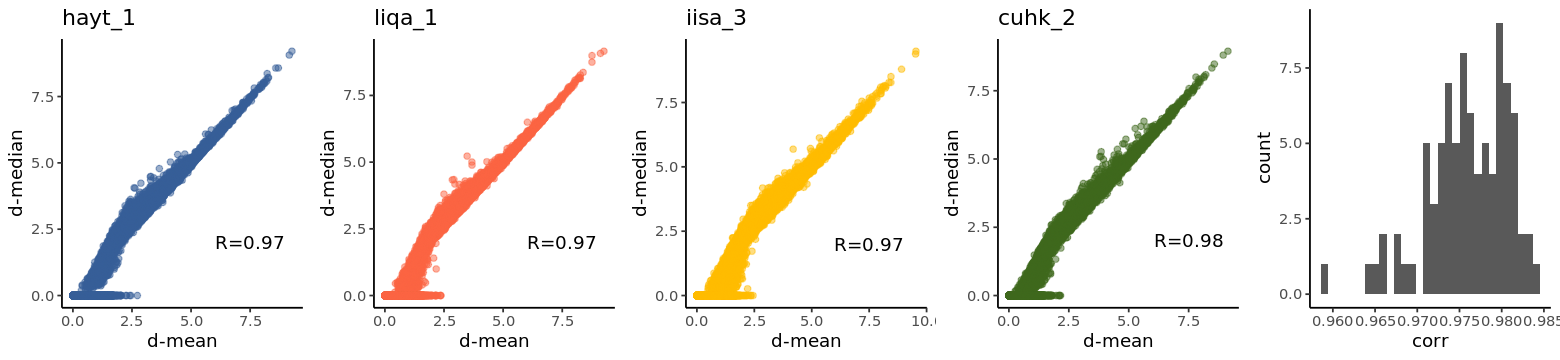

In [28]:
pl = list()
j = 1
for (i in selected_donors){
    df = data.frame(x = dmean[,i], y = dmedian[,i])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[j])  
    p = p + xlab("d-mean") + ylab("d-median")
    p = p + ggtitle(donors[i]) + theme_classic()
    p = p + annotate("text", x = 7.5, y = 2, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

df1 = data.frame()
for (i in 1:length(donors)){
    donor = donors[i]
    d_mean = as.numeric(dmean[,colnames(dmean) == donor])
    d_median = as.numeric(dmedian[,colnames(dmedian) == donor])
    df1 = rbind(df1, data.frame(donor = donor, corr = cor(d_mean,d_median)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

options(repr.plot.width = 13, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], ncol=5)

In [32]:
### d-median vs d-sum

In [37]:
pl = list()
j = 1
for (i in selected_donors){
    df = data.frame(x = dmedian[,i], y = dsum[,i])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[j])  
    p = p + xlab("d-median") + ylab("d-sum")
    p = p + ggtitle(donors[i]) + theme_classic()
    p = p + annotate("text", x = 9, y = 2, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

In [38]:
df1 = data.frame()
for (i in 1:length(donors)){
    donor = donors[i]
    d_median = as.numeric(dmedian[,colnames(dmedian) == donor])
    d_sum = as.numeric(dsum[,colnames(dsum) == donor])
    df1 = rbind(df1, data.frame(donor = donor, corr = cor(d_median, d_sum)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


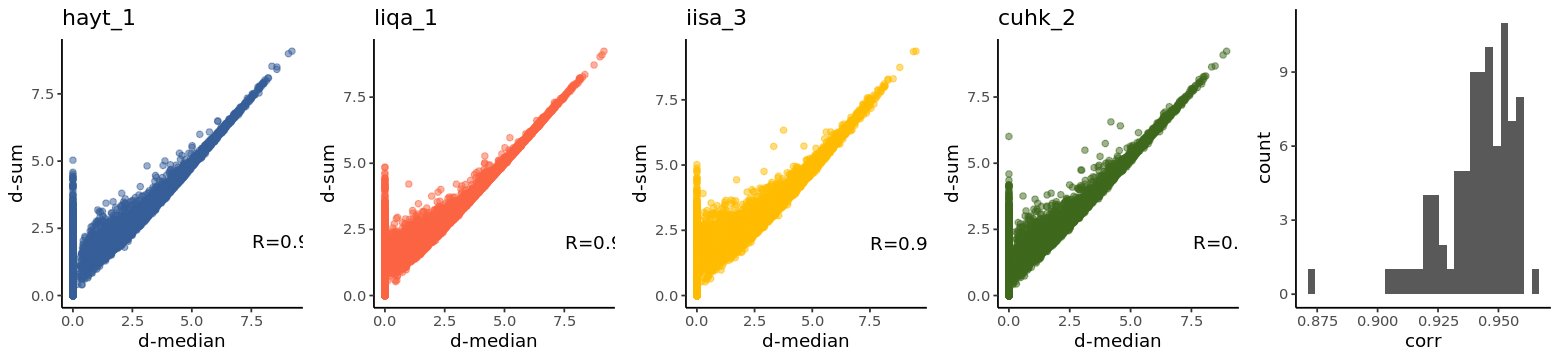

In [39]:
options(repr.plot.width = 13, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], ncol=5)

In [40]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    d_mean = as.numeric(dmean[rownames(dmean) == gene,])
    d_sum = as.numeric(dsum[rownames(dsum) == gene,])
    df = rbind(df, data.frame(gene = gene,corr = cor(d_mean,d_sum)))
}
# head(df)

In [41]:
p1 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(d-mean,d-sum)")

In [42]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    d_mean = as.numeric(dmean[rownames(dmean) == gene,])
    d_median = as.numeric(dmedian[rownames(dmedian) == gene,])
    df = rbind(df, data.frame(gene = gene,corr = cor(d_mean,d_median)))
}
# head(df)

Warning message in cor(d_mean, d_median):
“the standard deviation is zero”Warning message in cor(d_mean, d_median):
“the standard deviation is zero”Warning message in cor(d_mean, d_median):
“the standard deviation is zero”Warning message in cor(d_mean, d_median):
“the standard deviation is zero”

In [43]:
p2 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(d-mean,d-median)")

In [44]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    d_median = as.numeric(dmedian[rownames(dmedian) == gene,])
    d_sum = as.numeric(dsum[rownames(dsum) == gene,])
    df = rbind(df, data.frame(gene = gene,corr = cor(d_sum,d_median)))
}
# head(df)

Warning message in cor(d_sum, d_median):
“the standard deviation is zero”Warning message in cor(d_sum, d_median):
“the standard deviation is zero”Warning message in cor(d_sum, d_median):
“the standard deviation is zero”Warning message in cor(d_sum, d_median):
“the standard deviation is zero”

In [45]:
p3 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(d-median,d-sum)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

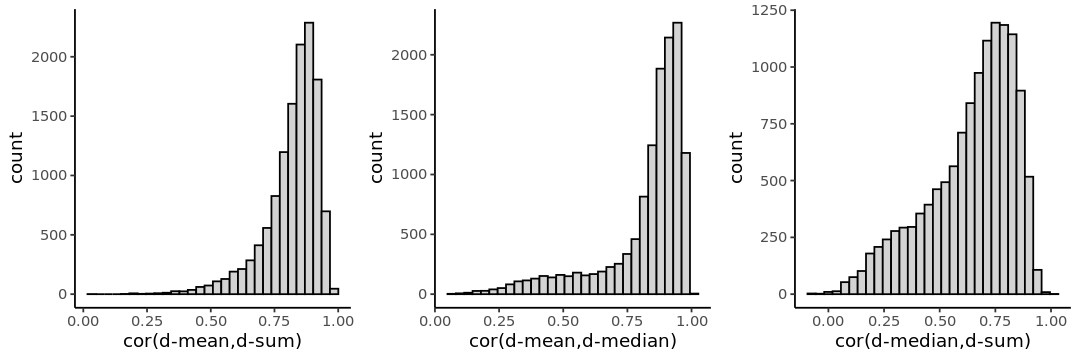

In [46]:
options(repr.plot.width = 9, repr.plot.height = 3)
plot_grid(p1, p2, p3, ncol=3)

In [50]:
# select donor-runs combinations
samples = colnames(drmean)
selected_samples = c()
for (donor in donors[selected_donors]){
    selected_samples = c(selected_samples, samples[grep(donor, samples)])
    }
selected_samples

[1] "hayt_1_25013_6" "liqa_1_25619_5" "liqa_1_25619_7" "iisa_3_24475_5"
[5] "iisa_3_25262_8" "cuhk_2_24351_3"

In [24]:
# dr-mean vs dr-sum

In [25]:
pl = list()
j = 1
n = 0
donor = "x"
for (sample in selected_samples){
    cur_don = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    if (cur_don != donor){
        n = n+1
        donor = cur_don
    }
    df = data.frame(x = drmean[,colnames(drmean)==sample], y = drsum[,colnames(drsum)==sample])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[n])  
    p = p + xlab("dr-mean") + ylab("dr-sum")
    p = p + ggtitle(sample) + theme_classic()
    p = p + annotate("text", x = 7.5, y = 2.5, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

In [26]:
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    dr_mean = as.numeric(drmean[,colnames(drmean) == sample])
    dr_sum = as.numeric(drsum[,colnames(drsum) == sample])
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_mean, dr_sum)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


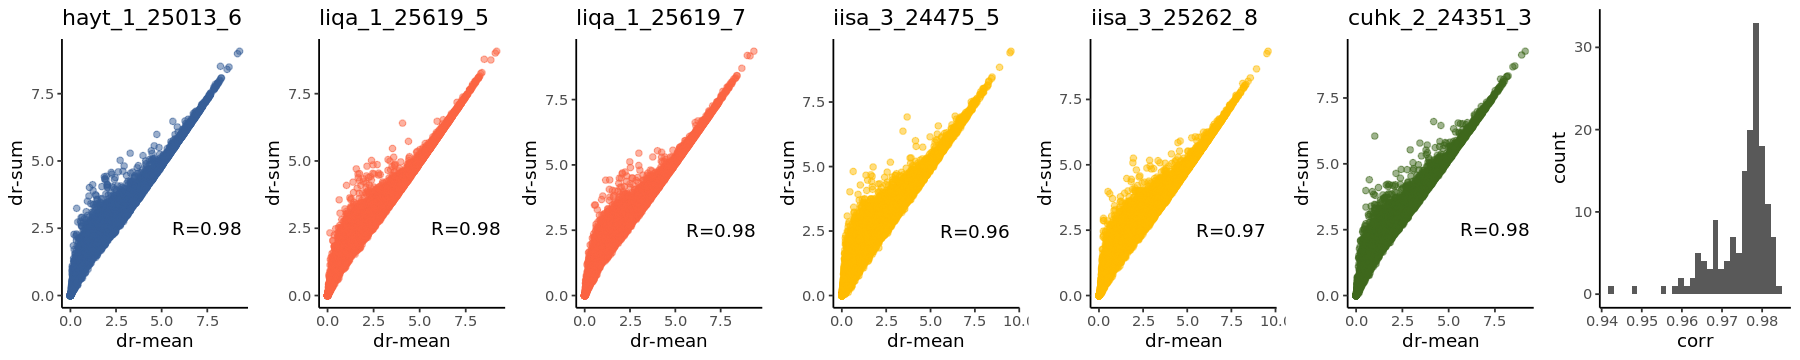

In [27]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], pl[[6]], pl[[7]], ncol=7)

In [ ]:
# dr-mean vs dr-median

In [283]:
pl = list()
j = 1
n = 0
donor = "x"
for (sample in selected_samples){
    cur_don = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    if (cur_don != donor){
        n = n+1
        donor = cur_don
    }
    df = data.frame(x = drmean[,colnames(drmean)==sample], y = drmedian[,colnames(drmedian)==sample])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[n])  
    p = p + xlab("dr-mean") + ylab("dr-median")
    p = p + ggtitle(sample) + theme_classic()
    p = p + annotate("text", x = 7.5, y = 2, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

In [284]:
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    dr_mean = as.numeric(drmean[,colnames(drmean) == sample])
    dr_median = as.numeric(drmedian[,colnames(drmedian) == sample])
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_mean, dr_median)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


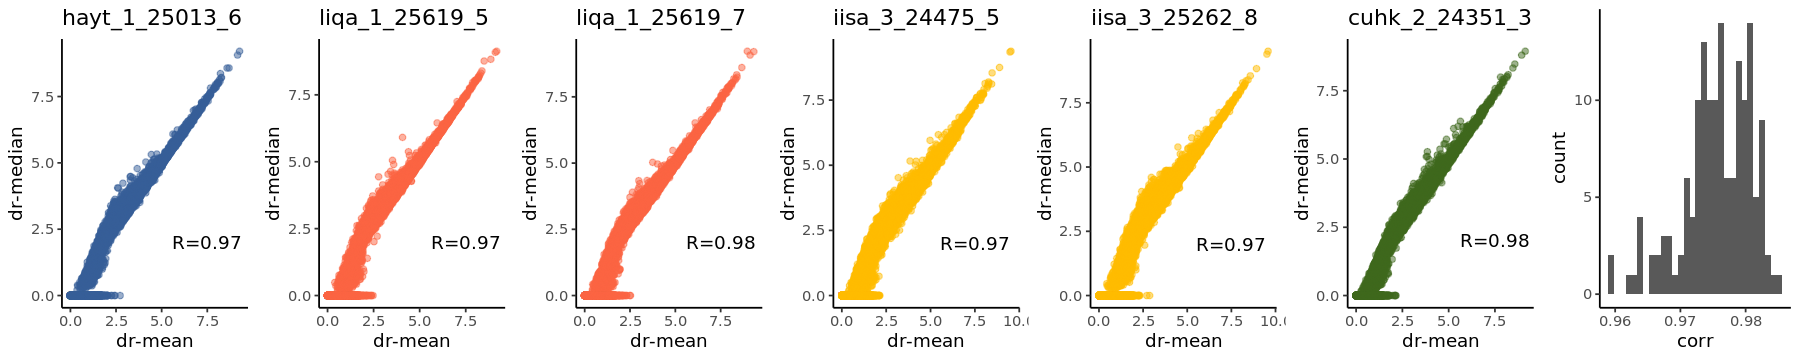

In [285]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], pl[[6]], pl[[7]], ncol=7)

In [ ]:
# dr-median vd dr-sum

In [286]:
pl = list()
j = 1
n = 0
donor = "x"
for (sample in selected_samples){
    cur_don = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    if (cur_don != donor){
        n = n+1
        donor = cur_don
    }
    df = data.frame(x = drmedian[,colnames(drmedian)==sample], y = drsum[,colnames(drsum)==sample])
    p = ggplot(df, aes(x = x, y = y)) + geom_point(alpha = 0.5, col = canva_pal("Primary colors with a vibrant twist")(4)[n])  
    p = p + xlab("dr-median") + ylab("dr-sum")
    p = p + ggtitle(sample) + theme_classic()
    p = p + annotate("text", x = 7.5, y = 2.5, label = paste0("R=",round(cor(df$x,df$y),digits=2)))
    pl[[j]] = p
    j=j+1
}

In [287]:
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    dr_median = as.numeric(drmedian[,colnames(drmedian) == sample])
    dr_sum = as.numeric(drsum[,colnames(drsum) == sample])
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_median, dr_sum)))
}
# head(df1)
pl[[j]] = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


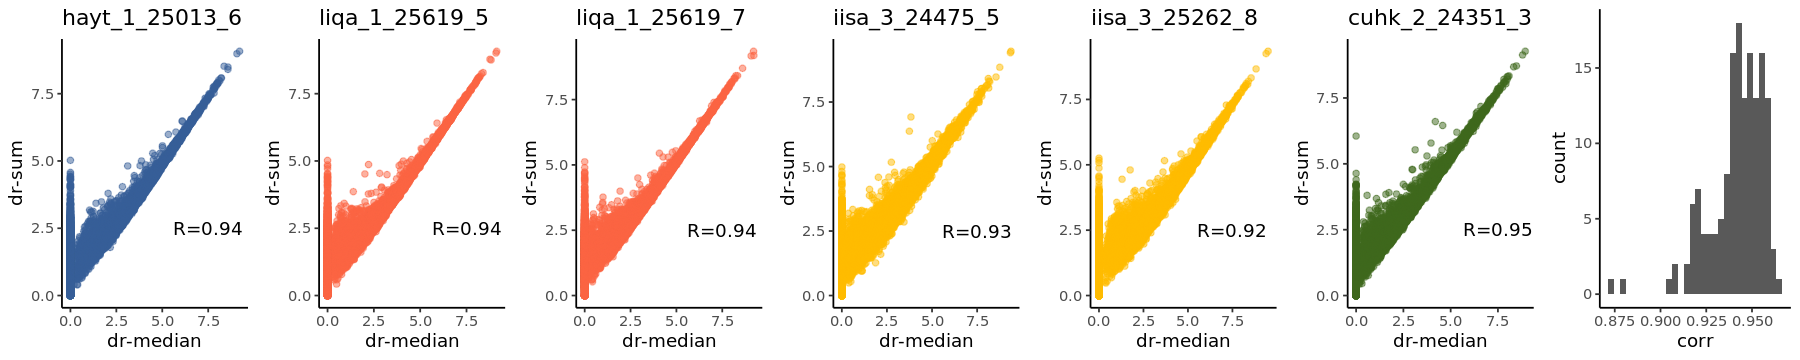

In [288]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_grid(pl[[1]], pl[[2]], pl[[3]], pl[[4]], pl[[5]], pl[[6]], pl[[7]], ncol=7)

In [335]:
samples = colnames(drmean)

[1] 154

[1] 154

In [339]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    dr_mean = as.numeric(drmean[rownames(drmean) == gene,])
    dr_sum = as.numeric(drsum[rownames(drsum) == gene,colnames(drsum) %in% samples])
    df = rbind(df, data.frame(gene = gene,corr = cor(dr_mean,dr_sum)))
}
# head(df)

In [340]:
p1 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(dr-mean,dr-sum)")

In [341]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    dr_mean = as.numeric(drmean[rownames(drmean) == gene,])
    dr_median = as.numeric(drmedian[rownames(drmedian) == gene, colnames(drmedian) %in% samples])
    df = rbind(df, data.frame(gene = gene,corr = cor(dr_mean,dr_median)))
}
# head(df)

In [342]:
p2 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(dr-mean,dr-median)")

In [343]:
df = data.frame()
for (i in 1:length(common_genes)){
    gene = common_genes[i]
    dr_median = as.numeric(drmedian[rownames(drmedian) == gene, colnames(drmedian) %in% samples])
    dr_sum = as.numeric(drsum[rownames(drsum) == gene,colnames(drsum) %in% samples])
    df = rbind(df, data.frame(gene = gene,corr = cor(dr_median,dr_sum)))
}
# head(df)

In [344]:
p3 = ggplot(df, aes(x=corr)) + geom_histogram(colour = "black",fill = "lightgrey") + theme_classic() + xlab("cor(dr-median,dr-sum)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


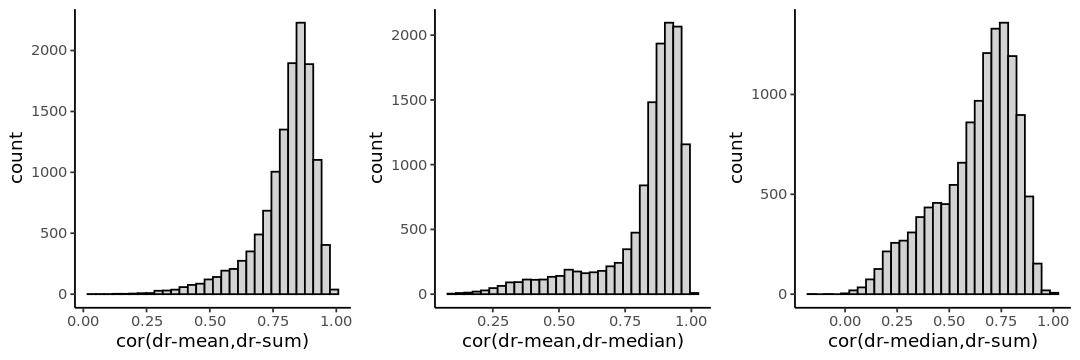

In [345]:
options(repr.plot.width = 9, repr.plot.height = 3)
plot_grid(p1, p2, p3, ncol=3)

In [51]:
# dr-mean vs d-mean
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    donor = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    dr_mean = as.numeric(drmean[,colnames(drmean) == sample])
    d_mean = as.numeric(dmean[,colnames(dmean) == donor])
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_mean, d_mean)))
}
# head(df1)
p1 = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic() + xlab("cor(dr-mean,d-mean)")

In [52]:
# dr-sum vs d-sum
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    donor = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    dr_sum = as.numeric(drsum[,colnames(drsum) == sample])
    d_sum = as.numeric(dsum[,colnames(dsum) == donor])
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_sum, d_sum)))
}
# head(df1)
p2 = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic() + xlab("cor(dr-sum,d-sum)")

In [53]:
# dr-median vs d-median
df1 = data.frame()
for (i in 1:length(samples)){
    sample = samples[i]
    donor = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
    dr_median = as.numeric(drmedian[,colnames(drmedian) == sample])
    d_median = dmedian[,colnames(dmedian) == donor]
    df1 = rbind(df1, data.frame(sample = sample, corr = cor(dr_median, d_median)))
}
# head(df1)
p3 = ggplot(df1, aes(x=corr)) + geom_histogram() + theme_classic() + xlab("cor(dr-median,d-median)")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


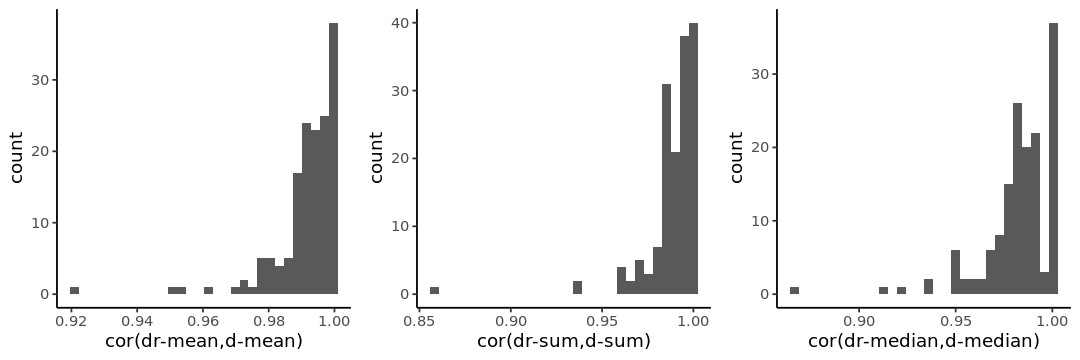

In [54]:
options(repr.plot.width = 9, repr.plot.height = 3)
plot_grid(p1, p2, p3, ncol=3)

In [123]:
df = data.frame()
genes = common_genes[common_genes %in% G_file$gene]
for (i in 1:length(genes)){
    gene = genes[i]
    d_mean = as.numeric(dmean[rownames(dmean) == gene,])
    d_sum = as.numeric(dsum[rownames(dsum) == gene,])
    df = rbind(df, data.frame(gene = gene,
                              corr = cor(d_mean,d_sum),
                              mean = G_file[G_file$gene == gene,"mean"],
                              CV = G_file[G_file$gene == gene,"CV"]))
}
head(df)

gene,corr,mean,CV
ENSG00000007047,0.9027140,2.555673,2.1342949
ENSG00000007255,0.9028258,20.154773,0.9226775
ENSG00000012061,0.6492725,27.804713,0.8871581
ENSG00000073008,0.8233185,6.754005,1.7954291
ENSG00000104853,0.7228888,45.248511,0.8433858
ENSG00000104856,0.8932199,2.685026,2.5247019


In [139]:
i = 100
gene = genes[i]
gene
d_mean = as.numeric(dmean[rownames(dmean) == gene,])
d_sum = as.numeric(dsum[rownames(dsum) == gene,])
cor(d_mean,d_sum)
G_file[G_file$gene == gene,]

[1] "ENSG00000073921"

[1] 0.8247961

,gene,mean,std,CV,quartile_cv
35340,ENSG00000073921,9.082616,13.77462,1.516592,2


In [124]:
# nrow(df)

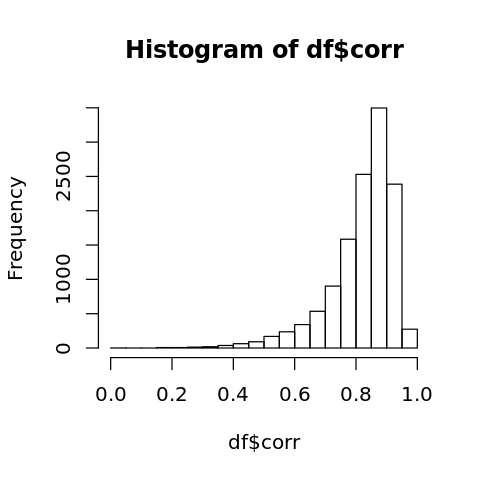

In [140]:
hist(df$corr)

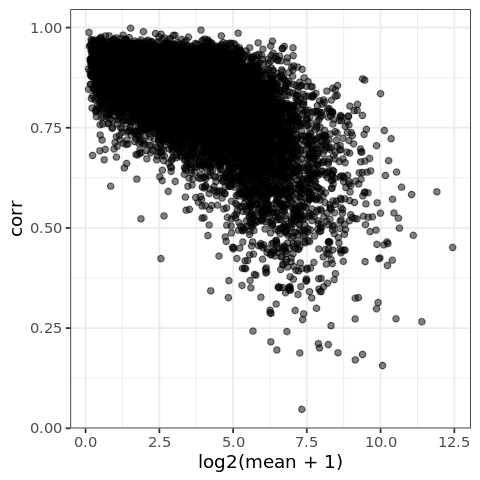

In [144]:
ggplot(df, aes(x=log2(mean+1), y = corr)) + geom_point(alpha = 0.5) + theme_bw() 

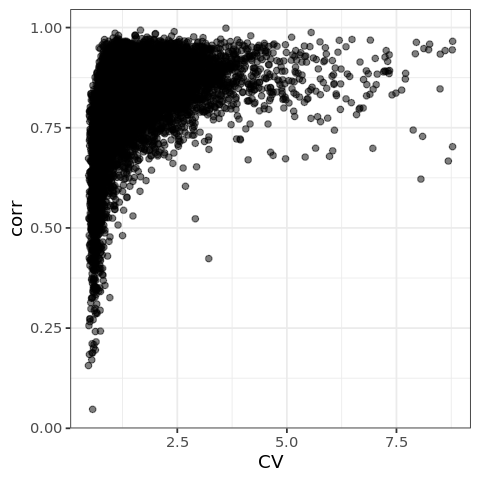

In [131]:
ggplot(df, aes(x=CV, y = corr)) + geom_point(alpha = 0.5) + theme_bw() #+ 
#     xlab("Mean expression (log2)") + ylab("corr(mean,sum)")

In [43]:
n = 0
for (i in 1:length(common_genes)){
    gene1 = as.numeric(dmean[i,])
    gene2 = as.numeric(dsum[i,])
#     if (cor(gene1,gene2) < 0.5){
#         print(c(common_genes[i], cor(gene1,gene2)))
#     }
    n = n + cor(gene1,gene2)
}
n/length(common_genes)

[1] 0.8196504

In [44]:
n = 0
donors = ncol(dmean)
for (i in 1:length(donors)){
    don1 = as.numeric(dmean[,i])
    don2 = as.numeric(dsum[,i])
    n = n + cor(don1,don2)
}
n/length(donors)

[1] 0.9786319

In [142]:
df1 = data.frame()
donors = colnames(dmean)
for (i in 1:length(donors)){
    donor = donors[i]
    d_mean = as.numeric(dmean[,colnames(dmean) == donor])
    d_sum = as.numeric(dsum[,colnames(dsum) == donor])
    df1 = rbind(df1, data.frame(donor = donor,
                              corr = cor(d_mean,d_sum)))
}
head(df1)

donor,corr
aowh_2,0.9786319
aoxv_3,0.9786069
bezi_1,0.9693568
bokz_5,0.9777415
ciwj_2,0.9760754
cuhk_2,0.9760438


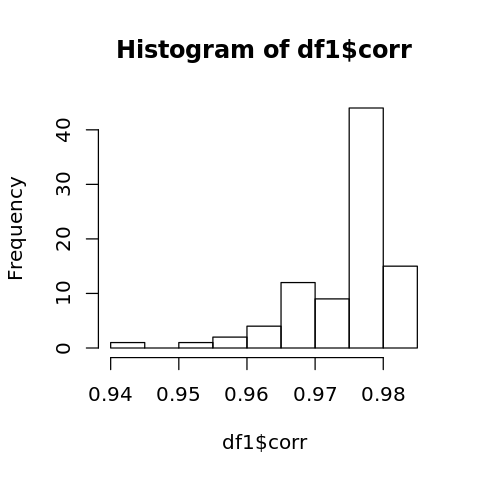

In [143]:
hist(df1$corr)

[1] 0.9914787

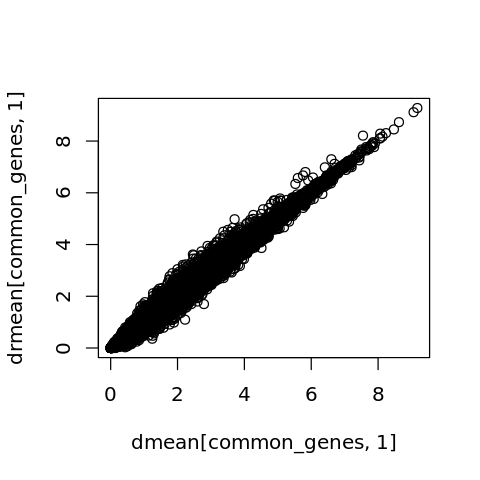

In [45]:
cor(dmean[common_genes,1],drmean[common_genes,1])
plot(dmean[common_genes,1],drmean[common_genes,1])

In [26]:
sample = colnames(drmean)[1]
sample
donor = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
donor

[1] "aowh_2_22607_6"

[1] "aowh_2"

In [ ]:
for (sample in colnames(drmean)){
   donor = paste0(strsplit(sample,"_")[[1]][1],"_",strsplit(sample,"_")[[1]][2])
}